In [142]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

Submissions are evaluated on Root-Mean-Squared-Error (RMSE)


In [ ]:
# Task 1
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
print(data.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [ ]:
data.sample(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
625    626          20       RL         87.0    10000   Pave   NaN      IR1   
1039  1040         180       RM         21.0     1477   Pave   NaN      Reg   
908    909          20       RL          NaN     8885   Pave   NaN      IR1   
752    753          20       RL         79.0     9236   Pave   NaN      IR1   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
1302  1303          60       RL         92.0    10120   Pave   NaN      Reg   
973    974          20       FV         95.0    11639   Pave   NaN      Reg   
14      15          20       RL          NaN    10920   Pave   NaN      IR1   
17      18          90       RL         72.0    10791   Pave   NaN      Reg   
684    685          60       RL         58.0    16770   Pave   NaN      IR2   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
625          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1039         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
908          Low    AllPub  ...        0    NaN  MnPrv         NaN       0   
752          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1302         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
973          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
14           Lvl    AllPub  ...        0    NaN   GdWo         NaN       0   
17           Lvl    AllPub  ...        0    NaN    NaN        Shed     500   
684          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
625       2   2010        WD         Normal     160000  
1039      4   2009        WD         Normal      80000  
908       6   2006        WD         Normal     131000  
752       7   2006        WD         Normal     217000  
1         5   2007        WD         Normal     181500  
1302     12   2006        WD         Normal     290000  
973      12   2008       New        Partial     182000  
14        5   2008        WD         Normal     157000  
17       10   2006        WD         Normal      90000  
684       6   2010        WD         Normal     221000  

[10 rows x 81 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
data.isnull().sum().sort_values(ascending=False).head(21)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
Functional         0
dtype: int64

In [66]:
def pre_proc(data):
    num_data=data.select_dtypes(include='number')
    num_cols=num_data.columns
    for col in num_cols:
        data[col]=data[col].fillna(data[col].median())

    obj_data=data.select_dtypes(include='object')
    obj_cols=obj_data.columns
    for col in obj_cols:
        data[col]=data[col].fillna(data[col].value_counts().idxmax())
    for col in obj_cols:
        data[col]=pd.factorize(data[col])[0]
    return data

pre_data=pre_proc(data)
pre_data.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0   1          60         0         65.0     8450       0      0         0   
1   2          20         0         80.0     9600       0      0         0   
2   3          60         0         68.0    11250       0      0         1   
3   4          70         0         60.0     9550       0      0         1   
4   5          60         0         84.0    14260       0      0         1   

   LandContour  Utilities  ...  PoolArea  PoolQC  Fence  MiscFeature  MiscVal  \
0            0          0  ...         0       0      0            0        0   
1            0          0  ...         0       0      0            0        0   
2            0          0  ...         0       0      0            0        0   
3            0          0  ...         0       0      0            0        0   
4            0          0  ...         0       0      0            0        0   

   MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       2    2008         0              0     208500  
1       5    2007         0              0     181500  
2       9    2008         0              0     223500  
3       2    2006         0              1     140000  
4      12    2008         0              0     250000  

[5 rows x 81 columns]

In [ ]:
pre_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int64  
 6   Alley          1460 non-null   int64  
 7   LotShape       1460 non-null   int64  
 8   LandContour    1460 non-null   int64  
 9   Utilities      1460 non-null   int64  
 10  LotConfig      1460 non-null   int64  
 11  LandSlope      1460 non-null   int64  
 12  Neighborhood   1460 non-null   int64  
 13  Condition1     1460 non-null   int64  
 14  Condition2     1460 non-null   int64  
 15  BldgType       1460 non-null   int64  
 16  HouseStyle     1460 non-null   int64  
 17  OverallQual    1460 non-null   int64  
 18  OverallC

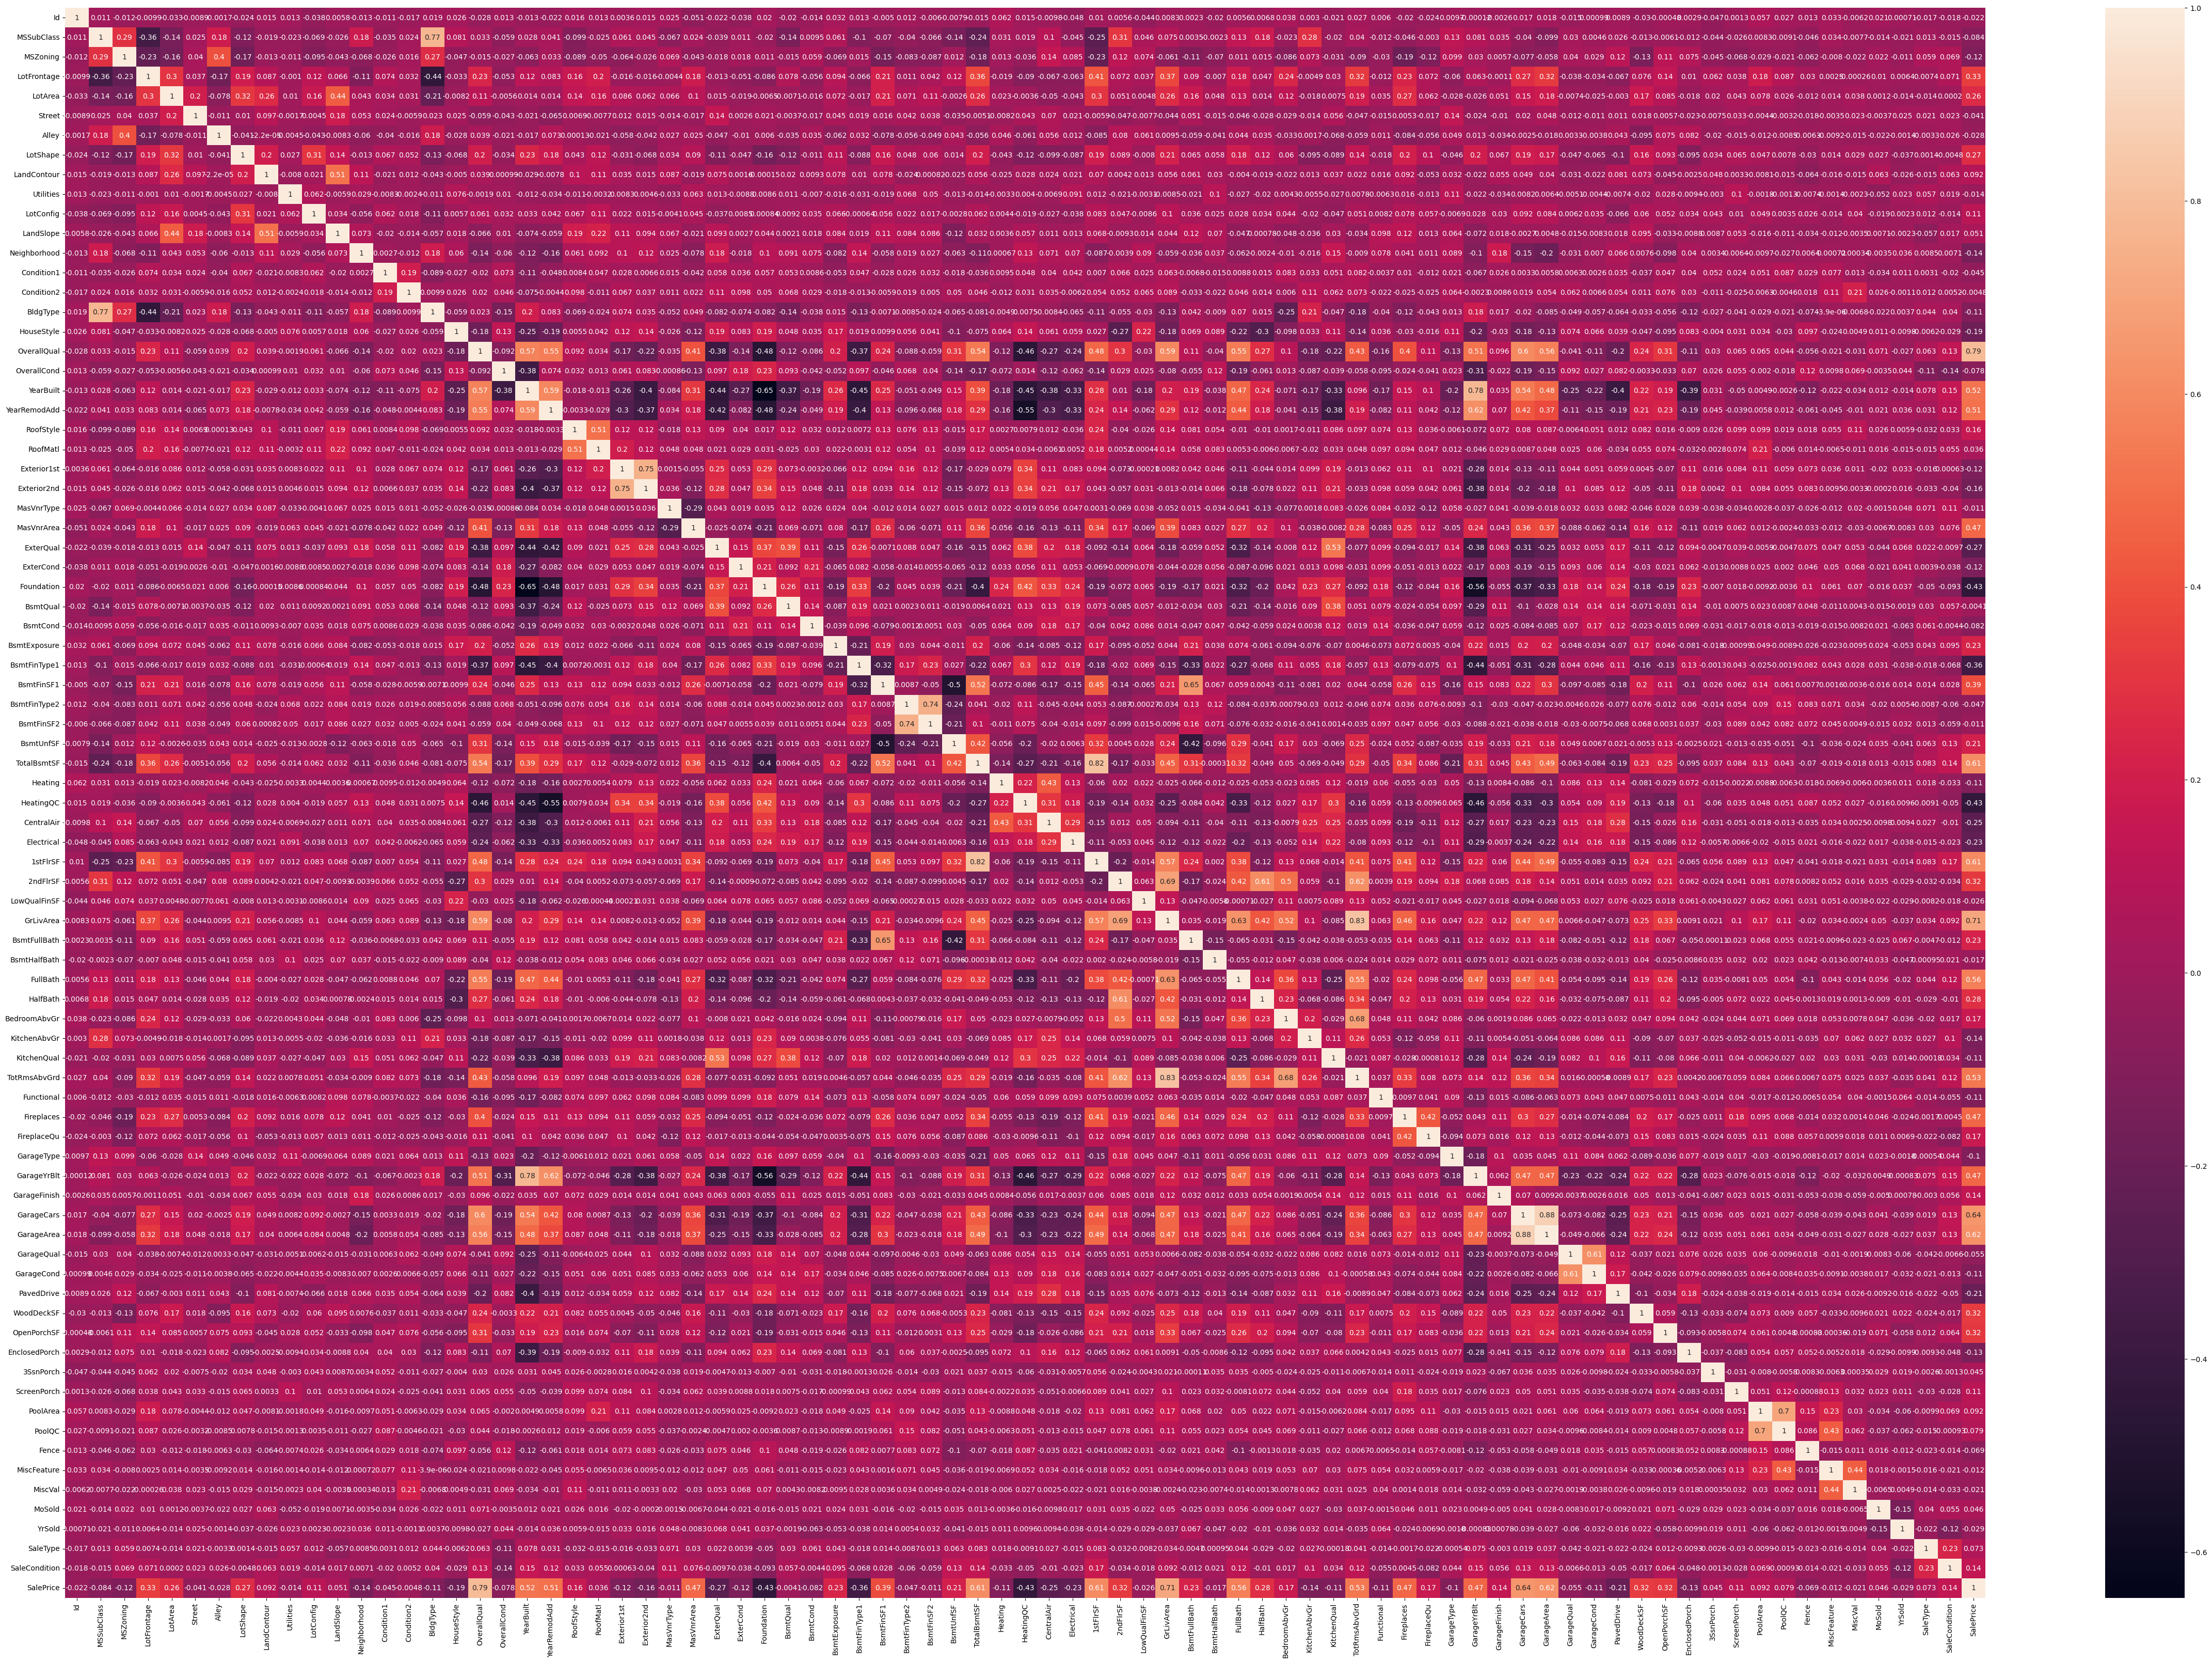

In [ ]:
corr = pre_data.corr()
plt.figure(figsize=(60,40))
sns.heatmap(data=corr,annot=True)
plt.show()

In [58]:
features = set()
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.7:
            colname_i = corr.columns[i]
            colname_j = corr.columns[j]
            features.add(colname_i)
            features.add(colname_j)
features_end = list(features)
print(features_end)

['BldgType', 'GarageArea', 'SalePrice', 'GarageYrBlt', 'YearBuilt', 'GarageCars', 'MSSubClass', '1stFlrSF', 'TotalBsmtSF', 'Exterior1st', 'GrLivArea', 'BsmtFinType2', 'TotRmsAbvGrd', 'OverallQual', 'BsmtFinSF2', 'Exterior2nd']


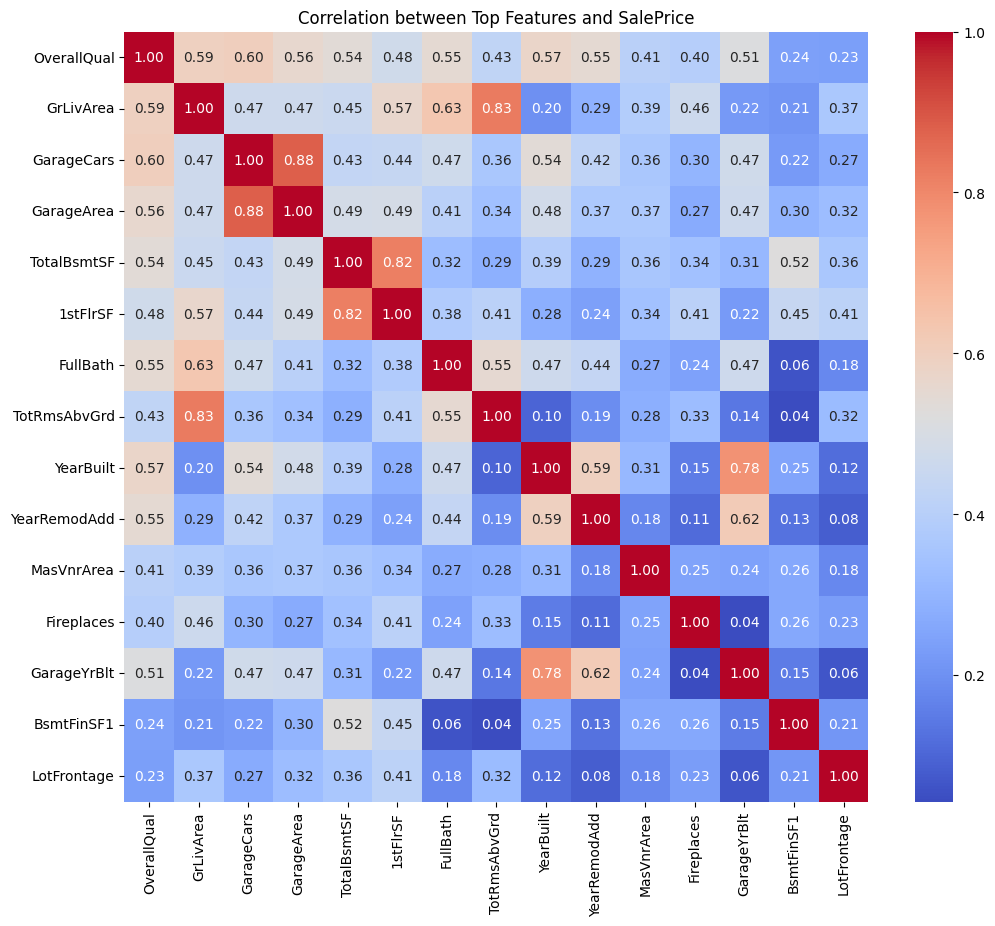

In [140]:
correlation_saleprice = data.corr()['SalePrice'].sort_values(ascending=False)

correlation_saleprice = correlation_saleprice.drop('SalePrice')

top_features = correlation_saleprice.index[:15]

correlation_matrix = data[top_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Top Features and SalePrice')
plt.show()

In [192]:

correlation_saleprice = data.corr()['SalePrice'].sort_values(ascending=False)

correlation_saleprice = correlation_saleprice.drop('SalePrice')

top_features = correlation_saleprice.index[:15]
print("Top Correlated Features with SalePrice:")
for feature in top_features:
    correlation_value = correlation_saleprice[feature]
    print(f"{feature}: {correlation_value:.2f}")

Top Correlated Features with SalePrice:
OverallQual: 0.79
GrLivArea: 0.71
GarageCars: 0.64
GarageArea: 0.62
TotalBsmtSF: 0.61
1stFlrSF: 0.61
FullBath: 0.56
TotRmsAbvGrd: 0.53
YearBuilt: 0.52
YearRemodAdd: 0.51
MasVnrArea: 0.47
Fireplaces: 0.47
GarageYrBlt: 0.47
BsmtFinSF1: 0.39
LotFrontage: 0.33


In [25]:
len(features_end)


16

In [28]:
data_for_train = pre_data[['BsmtFinType2', 'OverallQual', 'GrLivArea', 'MSSubClass', 'Exterior1st', 'GarageYrBlt', 'Exterior2nd', 'GarageCars', 'BldgType', 'BsmtFinSF2', 'YearBuilt', 'GarageArea', 'SalePrice', '1stFlrSF', 'TotalBsmtSF', 'TotRmsAbvGrd']]

In [29]:
data_for_train

BsmtFinType2  OverallQual  GrLivArea  MSSubClass  Exterior1st  \
0                0            7       1710          60            0   
1                0            6       1262          20            1   
2                0            7       1786          60            0   
3                0            7       1717          70            2   
4                0            8       2198          60            0   
...            ...          ...        ...         ...          ...   
1455             0            6       1647          60            0   
1456             3            6       2073          20            7   
1457             0            7       2340          70            6   
1458             3            5       1078          20            1   
1459             4            5       1256          20            3   

      GarageYrBlt  Exterior2nd  GarageCars  BldgType  BsmtFinSF2  YearBuilt  \
0          2003.0            0           2         0           0       2003   
1          1976.0            1           2         0           0       1976   
2          2001.0            0           2         0           0       2001   
3          1998.0            2           3         0           0       1915   
4          2000.0            0           3         0           0       2000   
...           ...          ...         ...       ...         ...        ...   
1455       1999.0            0           2         0           0       1999   
1456       1978.0            4           2         0         163       1978   
1457       1941.0            6           1         0           0       1941   
1458       1950.0            1           1         0        1029       1950   
1459       1965.0            3           1         0         290       1965   

      GarageArea  SalePrice  1stFlrSF  TotalBsmtSF  TotRmsAbvGrd  
0            548     208500       856          856             8  
1            460     181500      1262         1262             6  
2            608     223500       920          920             6  
3            642     140000       961          756             7  
4            836     250000      1145         1145             9  
...          ...        ...       ...          ...           ...  
1455         460     175000       953          953             7  
1456         500     210000      2073         1542             7  
1457         252     266500      1188         1152             9  
1458         240     142125      1078         1078             5  
1459         276     147500      1256         1256             6  

[1460 rows x 16 columns]

In [127]:
X = data_for_train.drop('SalePrice',axis = 1)
X

BsmtFinType2  OverallQual  GrLivArea  MSSubClass  Exterior1st  \
0                0            7       1710          60            0   
1                0            6       1262          20            1   
2                0            7       1786          60            0   
3                0            7       1717          70            2   
4                0            8       2198          60            0   
...            ...          ...        ...         ...          ...   
1455             0            6       1647          60            0   
1456             3            6       2073          20            7   
1457             0            7       2340          70            6   
1458             3            5       1078          20            1   
1459             4            5       1256          20            3   

      GarageYrBlt  Exterior2nd  GarageCars  BldgType  BsmtFinSF2  YearBuilt  \
0          2003.0            0           2         0           0       2003   
1          1976.0            1           2         0           0       1976   
2          2001.0            0           2         0           0       2001   
3          1998.0            2           3         0           0       1915   
4          2000.0            0           3         0           0       2000   
...           ...          ...         ...       ...         ...        ...   
1455       1999.0            0           2         0           0       1999   
1456       1978.0            4           2         0         163       1978   
1457       1941.0            6           1         0           0       1941   
1458       1950.0            1           1         0        1029       1950   
1459       1965.0            3           1         0         290       1965   

      GarageArea  1stFlrSF  TotalBsmtSF  TotRmsAbvGrd  
0            548       856          856             8  
1            460      1262         1262             6  
2            608       920          920             6  
3            642       961          756             7  
4            836      1145         1145             9  
...          ...       ...          ...           ...  
1455         460       953          953             7  
1456         500      2073         1542             7  
1457         252      1188         1152             9  
1458         240      1078         1078             5  
1459         276      1256         1256             6  

[1460 rows x 15 columns]

In [31]:
y = pre_data['SalePrice']
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LassoCV, RidgeCV

In [35]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
lasso = LassoCV()
params = {
    'eps': [0.01,0.001,0.0001],
    'n_alphas': [100,150,200]

}

gridLasso = GridSearchCV(lasso, params, refit=True, n_jobs=-1, cv=5)
gridLasso.fit(X_train, y_train)
print(f'Итоговые параметры:', gridLasso.best_params_)
print(f'Лучшая оценка:', gridLasso.best_score_)


Итоговые параметры: {'eps': 0.0001, 'n_alphas': 100}
Лучшая оценка: 0.7251926452755955


In [ ]:
# SCORE FOR Lasso
gridLasso.score(X_val, y_val)

0.7990339823001408

In [ ]:
Ridge = RidgeCV()
params = {
    'alphas': [0.1, 1.0, 10.0]

}

gridRidge = GridSearchCV(Ridge, params, refit=True, n_jobs=-1, cv=5)
gridRidge.fit(X_train, y_train)
print(f'Итоговые параметры:', gridRidge.best_params_)
print(f'Лучшая оценка:', gridRidge.best_score_)


Итоговые параметры: {'alphas': 10.0}
Лучшая оценка: 0.7240369310055204


In [ ]:
# SCORE FOR Ridge
gridRidge.score(X_val, y_val)

0.7949722472926786

In [176]:
def RMSE_Metric(y_val, y_pred):
    res = sum((y_val - y_pred)**2)
    RMSE = res/len(y_val)
    return RMSE


In [179]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_percentage_error,r2_score

In [191]:
model = XGBRegressor(booster='gbtree', objective='reg:squarederror',
                     random_state=42, n_estimators=10)

model.fit(X_train, y_train)
mean_squared_error(model.predict(X_val), y_val, squared=False)

29337.66264784802

In [169]:
pred = model.predict(X_val)

In [170]:
model.score(X_val, y_val)

0.875713304889058

In [174]:
RMSE_Metric(y_val,pred)

867284211.7214304

In [175]:
mean_squared_error(y_val,pred)

867284211.7214303

In [183]:
Grad_boost=GradientBoostingRegressor(n_estimators=700)
Grad_boost.fit(X,y)
mean_squared_error(Grad_boost.predict(X_val), y_val, squared=False)


9555.944798868893

In [132]:
data_for_train_test1_X = data_for_train.loc[:0]
data_for_train_test1_Y = data_for_train_test1_X['SalePrice']
data_for_train_test1_X

BsmtFinType2  OverallQual  GrLivArea  MSSubClass  Exterior1st  GarageYrBlt  \
0             0            7       1710          60            0       2003.0   

   Exterior2nd  GarageCars  BldgType  BsmtFinSF2  YearBuilt  GarageArea  \
0            0           2         0           0       2003         548   

   SalePrice  1stFlrSF  TotalBsmtSF  TotRmsAbvGrd  
0     208500       856          856             8

In [133]:
data_for_train_test1_X = data_for_train_test1_X.drop('SalePrice',axis = 1)
data_for_train_test1_X

BsmtFinType2  OverallQual  GrLivArea  MSSubClass  Exterior1st  GarageYrBlt  \
0             0            7       1710          60            0       2003.0   

   Exterior2nd  GarageCars  BldgType  BsmtFinSF2  YearBuilt  GarageArea  \
0            0           2         0           0       2003         548   

   1stFlrSF  TotalBsmtSF  TotRmsAbvGrd  
0       856          856             8

In [134]:
model.predict(data_for_train_test1_X)

array([205791.25], dtype=float32)

In [62]:
test = pd.read_csv('test.csv')


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
0            Lvl    AllPub  ...         120        0    NaN  MnPrv   
1            Lvl    AllPub  ...           0        0    NaN    NaN   
2            Lvl    AllPub  ...           0        0    NaN  MnPrv   
3            Lvl    AllPub  ...           0        0    NaN    NaN   
4            HLS    AllPub  ...         144        0    NaN    NaN   
...          ...       ...  ...         ...      ...    ...    ...   
1454         Lvl    AllPub  ...           0        0    NaN    NaN   
1455         Lvl    AllPub  ...           0        0    NaN    NaN   
1456         Lvl    AllPub  ...           0        0    NaN    NaN   
1457         Lvl    AllPub  ...           0        0    NaN  MnPrv   
1458         Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0            NaN       0      6    2010        WD         Normal  
1           Gar2   12500      6    2010        WD         Normal  
2            NaN       0      3    2010        WD         Normal  
3            NaN       0      6    2010        WD         Normal  
4            NaN       0      1    2010        WD         Normal  
...          ...     ...    ...     ...       ...            ...  
1454         NaN       0      6    2006        WD         Normal  
1455         NaN       0      4    2006        WD        Abnorml  
1456         NaN       0      9    2006        WD        Abnorml  
1457        Shed     700      7    2006        WD         Normal  
1458         NaN       0     11    2006        WD         Normal  

[1459 rows x 80 columns]

In [64]:
pre_data_test=pre_proc(test)
pre_data_test.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0  1461          20         0         80.0    11622       0      0         0   
1  1462          20         1         81.0    14267       0      0         1   
2  1463          60         1         74.0    13830       0      0         1   
3  1464          60         1         78.0     9978       0      0         1   
4  1465         120         1         43.0     5005       0      0         1   

   LandContour  Utilities  ...  ScreenPorch  PoolArea  PoolQC  Fence  \
0            0          0  ...          120         0       0      0   
1            0          0  ...            0         0       0      0   
2            0          0  ...            0         0       0      0   
3            0          0  ...            0         0       0      0   
4            1          0  ...          144         0       0      0   

   MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0            0        0       6    2010         0              0  
1            1    12500       6    2010         0              0  
2            0        0       3    2010         0              0  
3            0        0       6    2010         0              0  
4            0        0       1    2010         0              0  

[5 rows x 80 columns]

In [67]:
data_for_test = pre_data_test[['BsmtFinType2', 'OverallQual', 'GrLivArea', 'MSSubClass', 'Exterior1st', 'GarageYrBlt', 'Exterior2nd', 'GarageCars', 'BldgType', 'BsmtFinSF2', 'YearBuilt', 'GarageArea','1stFlrSF', 'TotalBsmtSF', 'TotRmsAbvGrd']]

In [86]:
preds = model.predict(data_for_test)

In [69]:
preds = model.predict(data_for_test)
ids = test['Id']
predict = pd.DataFrame({'Id': ids,
                       'SalePrice': preds})

predict.to_csv('submission.csv', index=False)

In [184]:
preds = Grad_boost.predict(data_for_test)
ids = test['Id']
predict = pd.DataFrame({'Id': ids,
                       'SalePrice': preds})

predict.to_csv('submission.csv', index=False)